## Exercise in Photogrammetry I
## **Ex.4 : Binary Images**
### Hand out: xx.xx.xxxx 
### Submission: xx.xx.xxxx 
### Points: 30

## A. Binary Images and Connected Components *(18 points)*

In this task you will learn how to **convert grayscale** images to **binary** images by applying a certain **thresold**. Finally, based on the binary image we can **identify** which **components** are connected to compute the **number of objects** in the image.

**Tasks:**
1. Load the grayscale image ```shapes.png``` from disk and print its minimum and maximum value. Finally, visualize the grayscale image. *(0.5 points)*
2. Convert the grayscale image to a binary image by applying a threshold of $T=100$. Make sure that all pixels > T have an intensity value of 1 (foreground) and all other pixels have an intensity value of 0 (background). Print the minimum and maximum value of your converted image. Finally, visualize the binary image. *(1.5 points)*
3. In the lecture you discussed two algorithms to identify connected components in a binary image. Implement the *Connected Components for Grids* algorithm and apply it to the previous defined binary image by following each step outlined below:
    - Write a function called ```connected_components(binary_img, neighborhood)``` which computes the *components image* for either *N4 neighborhood* or *N8 neighborhood* **but** does not apply the *equivalence graph* (see *Algorithm 1 in lecture*). Do not use any external python functions which compute the *components image* for you.  *(8 points)*
      <br> **Hint:** Write functions to get the *N4* and *N8 neighborhood* since this operation will be used in other tasks as well
      
    - Apply your function to the binary image and visualize your result for *N4 neighborhood* and *N8 neighborhood*. *(2 points)*
    - Apply the *equivalence graph* to the *components image* and visualize your result for *N4 neighborhood* and *N8 neighborhood*. *(4 points)*
    - Finally, print the number of components in the binary image for *N4 neighborhood* and *N8 neighborhood*. If there is any difference explain why this is the case. *(2 points)*
    

In [1]:
# import all required modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from skimage import io

### A1

In [2]:
# Load the grayscale image
image = io.imread("./images/shapes.png")

In [3]:
# Print the minimum and maximum value of the grayscale image
print("minimum value: ", np.min(image), ", maximum value: ", np.max(image))

minimum value:  0 , maximum value:  180


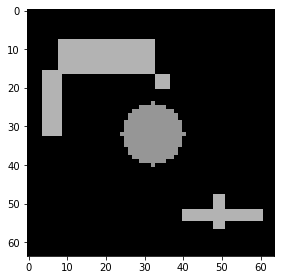

In [4]:
# Visualize the grayscale image
io.imshow(image)
plt.show()

### A2

In [5]:
# Convert the grayscale image to a binary image {0,1}
row = image.shape[1]
col = image.shape[0]

binary_image = np.zeros((col, row))
for i in range(row):
    for j in range(col):
        if image[j, i] > 100:
            binary_image[j, i] = 1

In [6]:
# Print the minimum and maximum value of the binary image
print("minimum value: ", np.min(binary_image), ", maximum value: ", np.max(binary_image))

minimum value:  0.0 , maximum value:  1.0


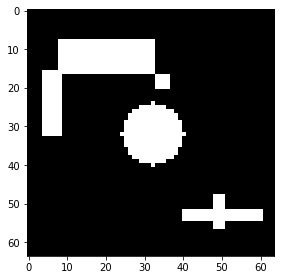

In [7]:
# Visualize the binary image
io.imshow(binary_image)
plt.show()

### A3

In [8]:
# Write a function called connected_components(binary_img, neighborhood)
def connected_components(binary_img, neighborhood):
    """ Find Connected Components.

    Args:
        binary_img (numpy.array, shape = (col, row)): value [0, 1].
        neighborhood (string): n4 or n8.

    Returns:
        CCimage (numpy.array, shape = (col, row)): value [0, 1, ... K].
    """
    
    row = binary_img.shape[1]
    col = binary_img.shape[0]
    
    visited = np.zeros((col, row), dtype=np.uint8)
    CCimage = np.zeros((col, row), dtype=np.uint8)
    index_num = 1
    
    for i in range(col):
        for j in range(row):
            if binary_img[i, j] == 1 and visited[i, j] == 0:
                pos = np.array([i, j])
                #print("O", pos)
                CC_image, visited = update_CCimage(binary_img, CCimage, visited, index_num, pos, neighborhood)
                index_num = index_num + 1
            elif visited[i, j] == 0:
                visited[i, j] = 1
                
    return CCimage
            

def find_neighborhood(binary_img, visited, pos, neighborhood):
    """ Find neighborhooda.

    Args:
        binary_img (numpy.array, shape = (col, row)): value [0, 1].
        visited (numpy.array, shape = (col, row)): value [0, 1].
        pos (numpy,array, shape = (1, 2)).
        neighborhood (string): n4 or n8.

    Returns:
        nh_array (numpy.array, shape = (K, 2)): ex) [[pos_1], [pos_2], ...].
    """
    row = visited.shape[1]
    col = visited.shape[0]
        
    nh_array = np.array([[0, 0]])
    if neighborhood == 'n4':
        if pos[0] > 0:
            nh_array = np.append(nh_array, [[pos[0] - 1, pos[1]]], axis=0)
        if pos[0] < col - 1:
            nh_array = np.append(nh_array, [[pos[0] + 1, pos[1]]], axis=0)
        if pos[1] > 0:
            nh_array = np.append(nh_array, [[pos[0], pos[1] - 1]], axis=0)
        if pos[1] < row - 1:
            nh_array = np.append(nh_array, [[pos[0], pos[1] + 1]], axis=0)
    elif neighborhood == 'n8':
        if pos[0] > 0:
            nh_array = np.append(nh_array, [[pos[0] - 1, pos[1]]], axis=0)
            if pos[1] > 0:
                nh_array = np.append(nh_array, [[pos[0] - 1, pos[1] - 1]], axis=0)
            if pos[1] < row - 1:
                nh_array = np.append(nh_array, [[pos[0] - 1, pos[1] + 1]], axis=0)
        if pos[0] < col - 1:
            nh_array = np.append(nh_array, [[pos[0] + 1, pos[1]]], axis=0)
            if pos[1] > 0:
                nh_array = np.append(nh_array, [[pos[0] + 1, pos[1] - 1]], axis=0)
            if pos[1] < row - 1:
                nh_array = np.append(nh_array, [[pos[0] + 1, pos[1] + 1]], axis=0) 
        if pos[1] > 0:
            nh_array = nh_array = np.append(nh_array, [[pos[0], pos[1] - 1]], axis=0)
        if pos[1] < row - 1:
            nh_array = np.append(nh_array, [[pos[0], pos[1] + 1]], axis=0)
   
    nh_array = np.delete(nh_array, 0, 0)
    delete_ = np.array([], dtype=np.uint8)
    for i in range(len(nh_array)):
        if visited[nh_array[i, 0], nh_array[i, 1]] == 1 or binary_img[nh_array[i, 0], nh_array[i, 1]] == 0:
            delete_ = np.append(delete_, [i])
    nh_array = np.delete(nh_array, delete_, 0)
     
    return nh_array

def update_CCimage(binary_img, CCimage, visited, index_num, pos, neighborhood):
    """ Update Connected componets Image.

    Args:
        binary_img (numpy.array, shape = (col, row)): value [0, 1].
        CCimage (numpy.array, shape = (col, row)): value [0, 1, ... K].
        visited  (numpy.array, shape = (col, row)): value [0, 1].
        index_num (int): 
        pos (numpy,array, shape = (1, 1)).
        neighborhood (string): n4 or n8.
    
    Returns:
        CCimage (numpy.array, shape = (col, row)): value [0, 1, ... K].
        visited  (numpy.array, shape = (col, row)): value [0, 1].
    """
    nh_array = find_neighborhood(binary_img, visited, pos, neighborhood)
    visited[pos[0], pos[1]] = 1
    CCimage[pos[0], pos[1]] = index_num
  
    while len(nh_array) != 0:
        tmp = np.array([nh_array[0, 0], nh_array[0, 1]])
        visited[tmp[0], tmp[1]] = 1
        CCimage[tmp[0], tmp[1]] = index_num
        nh_array = np.delete(nh_array, 0, 0)
        
        nh_array_ = find_neighborhood(binary_img, visited, tmp, neighborhood)
        nh_array = np.append(nh_array, nh_array_, axis=0)
        
        CCimage, visited = update_CCimage(binary_img, CCimage, visited, index_num, tmp, neighborhood)

    return CCimage, visited
    

<Figure size 432x288 with 0 Axes>

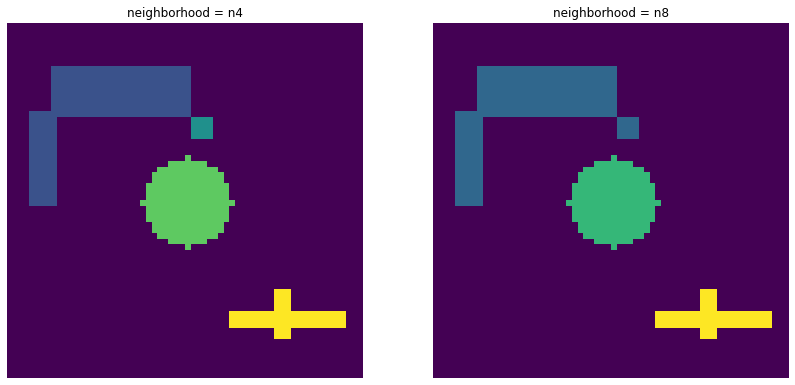

In [9]:
# Compute the components image with N4 Neighborhood and visualize your result
CCimage_n4 = connected_components(binary_image, 'n4')
CCimage_n8 = connected_components(binary_image, 'n8')

fig = plt.figure()
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(CCimage_n4*10)
ax1.set_title('neighborhood = n4')
ax1.axis("off")

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(CCimage_n8*10)
ax2.set_title('neighborhood = n8')
ax2.axis("off")

plt.show()

In [10]:
def equivalence_graph(binary_image, neighborhood):
    """ Update Connected componets Image Using equivalence graph.

    Args:
        binary_img (numpy.array, shape = (col, row)): value [0, 1].
        neighborhood (string): n4 or n8.
    
    Returns:
        CCimage (numpy.array, shape = (col, row)): value [0, 1, ... K].   
    """
    row = binary_image.shape[1]
    col = binary_image.shape[0]
    
    CCimage = np.zeros((col, row), dtype=np.uint8)
    index_num = 1

    # first row
    if binary_image[0, 0] == 1:
        CCimage[0, 0] = index_num
        index_num = index_num + 1
    for i in range(row-1):
        if binary_image[0, i+1] == 1:
            if CCimage[0, i] != 0:
                CCimage[0, i+1] = CCimage[0, i]
            else:
                CCimage[0, i+1] = index_num
                index_num = index_num + 1
                
    # second row ~ end row
    if neighborhood == 'n4':
        for i in range(col-1):
            if binary_image[i+1, 0] == 1:
                if binary_image[i, 0] == 1:
                    CCimage[i+1, 0] = CCimage[i, 0]
                else:
                    CCimage[i+1, 0] = index_num
                    index_num = index_num + 1     
            for j in range(row-1):
                if binary_image[i+1, j+1] == 1:
                    if binary_image[i+1, j] == 1:
                        CCimage[i+1, j+1] = CCimage[i+1, j]
                    else:
                        if binary_image[i, j+1] == 1:
                            CCimage[i+1, j+1] = CCimage[i, j+1]
                        else:
                            CCimage[i+1, j+1] = index_num
                            index_num = index_num + 1
    elif neighborhood == 'n8':
        for i in range(col-1):
            if binary_image[i+1, 0] == 1:
                if binary_image[i, 0] == 1:
                    CCimage[i+1, 0] = CCimage[i, 0]
                else:
                    CCimage[i+1, 0] = index_num
                    index_num = index_num + 1     
            for j in range(row-1):
                if binary_image[i+1, j+1] == 1:
                    if binary_image[i+1, j] == 1:
                        CCimage[i+1, j+1] = CCimage[i+1, j]
                    else:
                        if binary_image[i, j] == 1:
                            CCimage[i+1, j+1] = CCimage[i, j]
                        else:
                            if binary_image[i, j+1] == 1:
                                CCimage[i+1, j+1] = CCimage[i, j+1]
                            else:
                                CCimage[i+1, j+1] = index_num
                                index_num = index_num + 1
    
    return CCimage

In [11]:
def cal_eqivalence_table(CCimage, neighborhood):
    """
    input
        CCimage (numpy.array, shape = (col, row)): value [0, 1, ... K].
        neighborhood (string): n4 or n8.
                
    output
        Equivalence_table (numpy.array): value [[same_index_1], [same_index_2], ...]
    """
     # Equivalence_table     
    Equivalence_table = np.array([0])
    CCimage_c = np.copy(CCimage)
    same_lable = np.array([])
    done_ = np.array([])
    max_ = np.max(CCimage)
    done_ = np.append(done_, np.array(range(1,max_+1,1)))
    print("done : ", done_)
    
    if neighborhood == 'n4':
        while done_.shape[0] != 0:
            for j in range(CCimage_c.shape[0]):
                for i in range(CCimage_c.shape[1]):
                    cur = CCimage_c[j, i]                        
                    if cur != 0:
                        if same_lable.shape[0] == 0:
                            if np.where(done_ == cur)[0].shape[0] == 0:
                                continue
                            else:
                                same_lable = np.append(same_lable, cur)
                                done_ = np.delete(done_, np.where(done_ == cur))
                        if np.where(same_lable == cur)[0].shape[0] != 0 and np.where(done_ == cur)[0].shape[0] != 0:
                            if i <= 0:
                                if j <= 0:
                                    if CCimage_c[j, i+1] != cur:
                                        if np.where(same_lable == CCimage_c[j, i+1])[0].shape[0] != 0:
                                            same_lable = np.append(same_lable, CCimage_c[j, i+1])
                                            done_ = np.delete(done_, np.where(done_ == CCimage_c[j, i+1]))
                                    if CCimage_c[j+1, i] != cur:
                                        if np.where(same_lable == CCimage_c[j+1, i])[0].shape[0] != 0:
                                            same_lable = np.append(same_lable, CCimage_c[j+1, i])
                                            done_ = np.delete(done_, np.where(done_ == CCimage_c[j+1, i]))

                                elif j > 0 and j < CCimage_c.shape[0]-1:
                                    if CCimage_c[j-1, i] != cur:
                                        if np.where(same_lable == CCimage_c[j-1, i])[0].shape[0] != 0:
                                            same_lable = np.append(same_lable, CCimage_c[j-1, i])
                                            done_ = np.delete(done_, np.where(done_ == CCimage_c[j-1, i]))
                                    if CCimage_c[j, i+1] != cur:
                                        if np.where(same_lable == CCimage_c[j, i+1])[0].shape[0] != 0:
                                            same_lable = np.append(same_lable, CCimage_c[j, i+1])
                                            done_ = np.delete(done_, np.where(done_ == CCimage_c[j, i+1]))
                                    if CCimage_c[j+1, i] != cur:
                                        if np.where(same_lable == CCimage_c[j+1, i])[0].shape[0] != 0:
                                            same_lable = np.append(same_lable, CCimage_c[j+1, i])
                                            done_ = np.delete(done_, np.where(done_ == CCimage_c[j+1, i]))

                                elif j >= CCimage_c.shape[0]-1:
                                    if CCimage_c[j-1, i] != cur:
                                        if np.where(same_lable == CCimage_c[j-1, i])[0].shape[0] != 0:
                                            same_lable = np.append(same_lable, CCimage_c[j-1, i])
                                            done_ = np.delete(done_, np.where(done_ == CCimage_c[j-1, i]))
                                    if CCimage_c[j, i+1] != cur:
                                        if np.where(same_lable == CCimage_c[j, i+1])[0].shape[0] != 0:
                                            same_lable = np.append(same_lable, CCimage_c[j, i+1])
                                            done_ = np.delete(done_, np.where(done_ == CCimage_c[j, i+1]))
                            elif i >= CCimage_c.shape[1]-1:
                                if j <= 0:
                                    if CCimage_c[j-1, i] != cur:
                                        if np.where(same_lable == CCimage_c[j-1, i])[0].shape[0] != 0:
                                            same_lable = np.append(same_lable, CCimage_c[j-1, i])
                                            done_ = np.delete(done_, np.where(done_ == CCimage_c[j-1, i]))
                                    if CCimage_c[j+1, i] != cur:
                                        if np.where(same_lable == CCimage_c[j+1, i])[0].shape[0] != 0:
                                            same_lable = np.append(same_lable, CCimage_c[j+1, i])
                                            done_ = np.delete(done_, np.where(done_ == CCimage_c[j+1, i]))
                                elif j > 0 and j < CCimage_c.shape[0]-1:
                                    if CCimage_c[j, i-1] != cur:
                                        if np.where(same_lable == CCimage_c[j, i-1])[0].shape[0] != 0:
                                            same_lable = np.append(same_lable, CCimage_c[j, i-1])
                                            done_ = np.delete(done_, np.where(done_ == CCimage_c[j, i-1]))
                                    if CCimage_c[j-1, i] != cur:
                                        if np.where(same_lable == CCimage_c[j-1, i])[0].shape[0] != 0:
                                            same_lable = np.append(same_lable, CCimage_c[j-1, i])
                                            done_ = np.delete(done_, np.where(done_ == CCimage_c[j-1, i]))
                                    if CCimage_c[j+1, i] != cur:
                                        if np.where(same_lable == CCimage_c[j+1, i])[0].shape[0] != 0:
                                            same_lable = np.append(same_lable, CCimage_c[j+1, i])
                                            done_ = np.delete(done_, np.where(done_ == CCimage_c[j+1, i]))
                                elif j >= CCimage_c.shape[0]-1:
                                    if CCimage_c[j, i-1] != cur:
                                        if np.where(same_lable == CCimage_c[j, i-1])[0].shape[0] != 0:
                                            same_lable = np.append(same_lable, CCimage_c[j, i-1])
                                            done_ = np.delete(done_, np.where(done_ == CCimage_c[j, i-1]))
                                    if CCimage_c[j-1, i] != cur:
                                        if np.where(same_lable == CCimage_c[j-1, i])[0].shape[0] != 0:
                                            same_lable = np.append(same_lable, CCimage_c[j-1, i])
                                            done_ = np.delete(done_, np.where(done_ == CCimage_c[j-1, i]))
                            else:
                                if CCimage_c[j, i-1] != cur:
                                    if np.where(same_lable == CCimage_c[j, i-1])[0].shape[0] != 0:
                                        same_lable = np.append(same_lable, CCimage_c[j, i-1])
                                        done_ = np.delete(done_, np.where(done_ == CCimage_c[j, i-1]))
                                if CCimage_c[j-1, i] != cur:
                                    if np.where(same_lable == CCimage_c[j-1, i])[0].shape[0] != 0:
                                        same_lable = np.append(same_lable, CCimage_c[j-1, i])
                                        done_ = np.delete(done_, np.where(done_ == CCimage_c[j-1, i]))
                                if CCimage_c[j, i+1] != cur:
                                    if np.where(same_lable == CCimage_c[j, i+1])[0].shape[0] != 0:
                                        same_lable = np.append(same_lable, CCimage_c[j, i+1])
                                        done_ = np.delete(done_, np.where(done_ == CCimage_c[j, i+1]))
                                if CCimage_c[j+1, i] != cur:
                                    if np.where(same_lable == CCimage_c[j+1, i])[0].shape[0] != 0:
                                        same_lable = np.append(same_lable, CCimage_c[j+1, i])
                                        done_ = np.delete(done_, np.where(done_ == CCimage_c[j+1, i]))
                        else:
                            continue
            print("same label : ", same_lable)
            print("done : ", done_)
            if same_lable.shape[0] != 0:
                same_lable = np.append(same_lable, [0])
                Equivalence_table = np.append(Equivalence_table, same_lable)
            same_lable = np.array([])
                
    elif neighborhood == 'n8':
        pass
    
    return Equivalence_table

In [28]:
test = cal_eqivalence_table(e_CCimage_n4, 'n4')

done :  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
same label :  [1.]
done :  [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
same label :  [2.]
done :  [ 3.  4.  5.  6.  7.  8.  9. 10. 11.]
same label :  [3.]
done :  [ 4.  5.  6.  7.  8.  9. 10. 11.]
same label :  [4.]
done :  [ 5.  6.  7.  8.  9. 10. 11.]
same label :  [5.]
done :  [ 6.  7.  8.  9. 10. 11.]
same label :  [6.]
done :  [ 7.  8.  9. 10. 11.]
same label :  [7.]
done :  [ 8.  9. 10. 11.]
same label :  [8.]
done :  [ 9. 10. 11.]
same label :  [9.]
done :  [10. 11.]
same label :  [10.]
done :  [11.]
same label :  [11.]
done :  []


In [14]:
print(test)

[ 0.  1.  0.  2.  0.  3.  0.  4.  0.  5.  0.  6.  0.  7.  0.  8.  0.  9.
  0. 10.  0. 11.  0.]


In [22]:
a = np.array([])

print(a.shape[0])

0


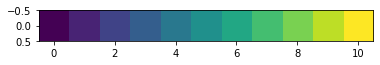

In [33]:
a = np.array([range(11)])
plt.imshow(a)
plt.show()

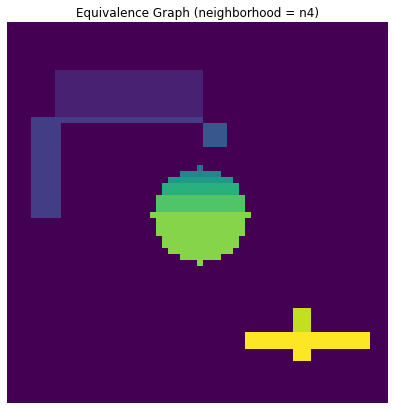

In [12]:
# Apply the equivalence graph to your components image with N4 Neighborhood and visualize your result
e_CCimage_n4 = equivalence_graph(binary_image, 'n4')

plt.figure(figsize = (7, 7))
plt.imshow(e_CCimage_n4)
plt.title('Equivalence Graph (neighborhood = n4)')
plt.axis('off')
plt.show()

In [47]:
for i in range(e_CCimage_n4.shape[0]):
    print(e_CCimage_n4[i,:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

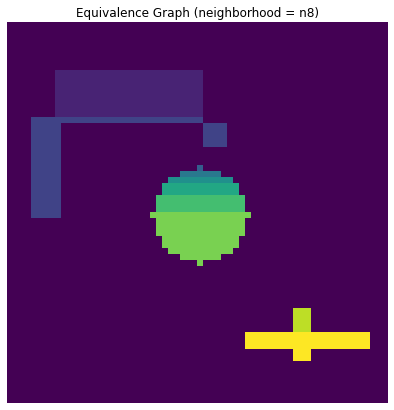

In [39]:
# Apply the equivalence graph to your components image with N8 Neighborhood and visualize your result
e_CCimage_n4 = equivalence_graph(binary_image, 'n8')

plt.figure(figsize = (7, 7))
plt.imshow(e_CCimage_n4)
plt.title('Equivalence Graph (neighborhood = n8)')
plt.axis('off')
plt.show()

In [ ]:
# Print the number of components in the binary image for N4 Neighborhood and N8 Neighborhood
pass

If there is any difference in the number of components explains why this is the case:<br>
*Your answer*

## B. Morphological Operations and Distance Transformation *(12 points)*

In the lecture your discussed *Morphological Operators* to expand and shrink the foreground of binary images as well as the *Distance Transformation* to compute the distance from any pixel to the border of the components.

**Tasks:**
1. Implement the *Distance Transformation* algorithm and apply it to the previous defined binary image (*A2*) by following each step outlined below:
    - Write a function called ```distance_transformation(binary_img, neighborhood)``` which computes the *distance image* for either *N4 neighborhood* or *N8 neighborhood*. Do not use any external python functions which compute the *distance image* for you. *(5 points)*
    - Apply your function to the binary image and visualize your result for *N4 neighborhood* and *N8 neighborhood*. *(2 points)*
    
2. Apply a *Dilation* to the binary image by using the the ```skimage.morphology``` module ([link](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.dilation))
    - Follow the steps provided by the [example](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.dilation) to dilate the binary image *(2 points)*
    - Visualize your results and describe your observations *(1 point)*
    
3. Finally, apply the *Distance Transformation* with N4 neighborhood to the dilated binary image and visualize your result. *(2 points)*

### B1

In [ ]:
# Write a function called distance_transformation(binary_img, neighborhood) to compute the distance matrix
def distance_transformation(binary_img, neighborhood):
    pass

In [ ]:
# Compute the distance matrix with N4 Neighborhood and visualize your result


In [ ]:
# Compute the distance matrix with N8 Neighborhood and visualize your result


### B2

In [ ]:
# Apply a Dilation to the binary image


In [ ]:
# Visualize the dilated binary image


**Explain your observations here**


### B3

In [ ]:
# Compute the distance matrix with N4 Neighborhood of the dilated binary image


In [ ]:
# Visualze the corresponding distance matrix
